<a href="https://colab.research.google.com/github/davidhoky/Scientific_Computing/blob/main/Scientific_Computing_Sesi_2_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LAB SESI 2**

David Christian Golden Mahaviro NIM 2802501306

In [1]:
import numpy as np
a = [[8,3,-3], [-2,-8,5], [3,5,10]]

#Find diagonal coefficients
diag = np.diag(np.abs(a))

#Find row sum without diagonal
off_diag = np.sum(np.abs(a), axis=1) - diag
if np.all(diag > off_diag):
  print('Matrix is diagonally dominant')
else:
  print('NOT diagonally dominant')


Matrix is diagonally dominant


In [3]:
x1 = 0
x2 = 0
x3 = 0
epsilon = 0.01
converged = False

x_old = np.array([x1, x2, x3])

for k in range(1, 50):
  x1 = (14 -  3*x2 + 3*x3) / 8
  x2 = (5 + 2*x1 - 5*x3) /8
  x3 = (-8 - 3*x1 - 5*x2) / 10
  x_new = np.array([x1, x2, x3])
  dx = np.sqrt(np.dot(x_new - x_old, x_new - x_old))

  print(f"(k), (x1:.4f), (x2:.4f), (x3:.4f)")

  if dx < epsilon:
    converged = True
    print('Converged!')
    break
  x_old = x_new

if not converged:
  print('Not converge, increase iterations')


(k), (x1:.4f), (x2:.4f), (x3:.4f)
(k), (x1:.4f), (x2:.4f), (x3:.4f)
(k), (x1:.4f), (x2:.4f), (x3:.4f)
(k), (x1:.4f), (x2:.4f), (x3:.4f)
(k), (x1:.4f), (x2:.4f), (x3:.4f)
(k), (x1:.4f), (x2:.4f), (x3:.4f)
Converged!


In [6]:
import numpy as np
A = np.array([[4,3,-5],
              [-2,-4,5],
              [8,8,0]])
y = np.array([2,5,-3])

x = np.linalg.solve(A, y)
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


[[1.06539998]
 [1.45950279]]


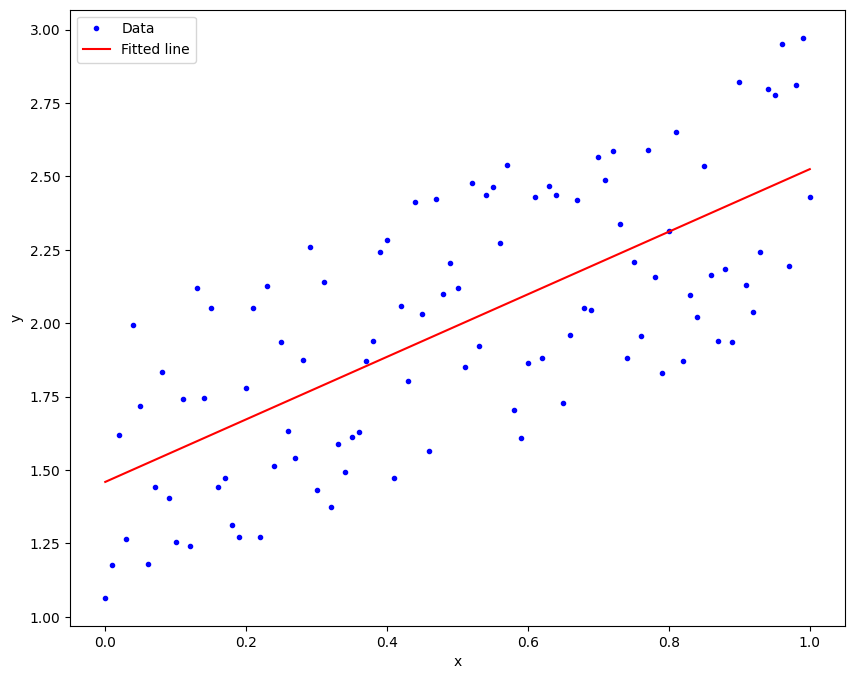

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data points
x = np.linspace(0, 1, 101)
y = 1 + x + np.random.random(len(x))  # Added noise to the linear relationship

# Create design matrix
A = np.vstack([x, np.ones(len(x))]).T

# Reshape y to a column vector
y = y[:, np.newaxis]

# Calculate regression coefficients
alpha = np.dot((np.linalg.inv(np.dot(A.T, A))), np.dot(A.T, y))

# Print coefficients
print(alpha)

# Plot the data and fitted line
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'b.', label='Data')
plt.plot(x, alpha[0]*x + alpha[1], 'r', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [12]:
import numpy as np
x = np.linspace(0, 1, 101)
y = 1 + x + x *np.random.random(len(x))

A = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]

pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)

print(alpha)

[[1.43273202]
 [1.00664121]]


In [13]:
import numpy as np
from scipy import optimize

x = np.linspace(0, 1, 101)
y = 1 + x + x *np.random.random(len(x))

A = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]

alpha = np.linalg.lstsq(A, y, rcond=None)[0]

print(alpha)


[[1.54946369]
 [1.00405   ]]


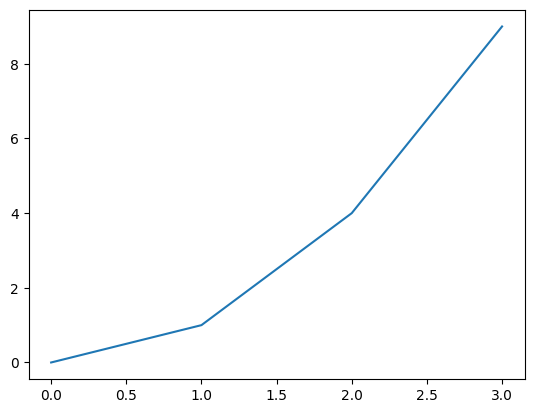

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = [0, 1, 2, 3]
y = [0, 1, 4, 9]

plt.plot(x,y)
plt.show()

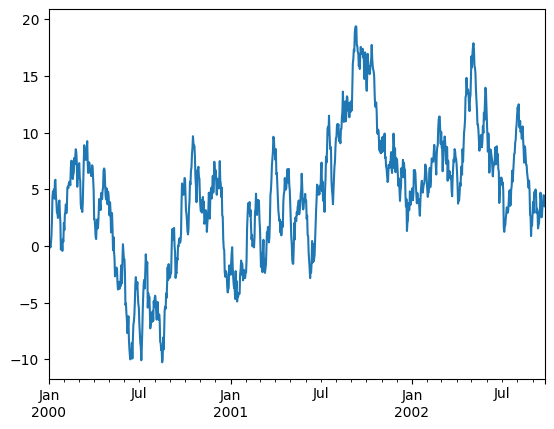

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()
plt.show()

<Figure size 640x480 with 0 Axes>

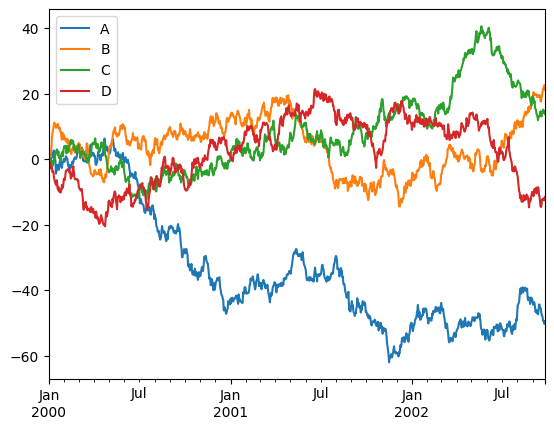

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()

plt.figure();
df.plot();
plt.show()

**MODUL SESI 2**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_seidel(A, B, x_init, tol=0.001, max_iter=100):
    x = np.array(x_init, dtype=float)
    n = len(B)
    for _ in range(max_iter):
        x_new = np.copy(x)
        for i in range(n):
            sum1 = sum(A[i][j] * x_new[j] for j in range(n) if j != i)
            x_new[i] = (B[i] - sum1) / A[i][i]
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new
        x = x_new
    return x

SOAL 1

In [4]:
# Soal 1: Sistem Persamaan 1
A1 = np.array([[2, 3, -1], [1, -1, 2], [3, 2, 1]], dtype=float)
B1 = np.array([10, 4, 14], dtype=float)
x_init1 = [5, 5, 5]
x_gauss_seidel_1 = gauss_seidel(A1, B1, x_init1)
x_numpy_1 = np.linalg.solve(A1, B1)

print("1a. Hasil Gauss-Seidel (Soal 1):", x_gauss_seidel_1)
print("1b. Hasil Numpy (Soal 1):", x_numpy_1)

1a. Hasil Gauss-Seidel (Soal 1): [-8.85379963e+93 -2.65613989e+94  7.96841967e+94]
1b. Hasil Numpy (Soal 1): [0.65 4.15 3.75]


SOAL 2

In [5]:
# Soal 2: Sistem Persamaan 2
A2 = np.array([[3, -0.1, -0.2], [0.1, 7, -0.3], [0.3, -0.2, 10]], dtype=float)
B2 = np.array([7.85, -19.3, 71.4], dtype=float)
x_init2 = [1, 2, 3]
x_gauss_seidel_2 = gauss_seidel(A2, B2, x_init2)
x_numpy_2 = np.linalg.solve(A2, B2)

print("2a. Hasil Gauss-Seidel (Soal 2):", x_gauss_seidel_2)
print("2b. Hasil Numpy (Soal 2):", x_numpy_2)

2a. Hasil Gauss-Seidel (Soal 2): [ 3.00000022 -2.50000002  6.99999999]
2b. Hasil Numpy (Soal 2): [ 3.  -2.5  7. ]


SOAL 3

3a. Persamaan regresi: y = 2.000x + 0.000


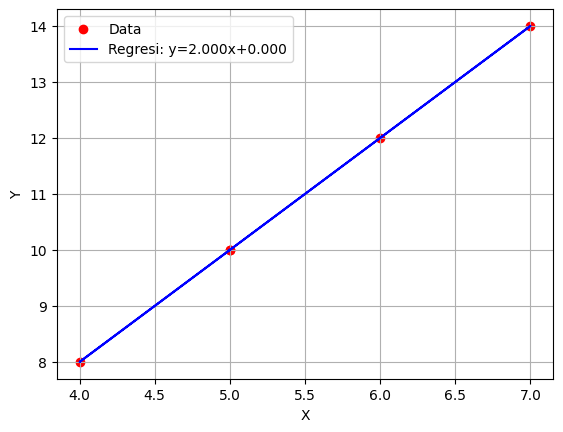

3b. Plot hasil regresi ditampilkan.


In [6]:
# Soal 3: Regresi Linear dengan Least Squares
X = np.array([5, 4, 6, 7, 5], dtype=float)
Y = np.array([10, 8, 12, 14, 10], dtype=float)

# Perhitungan Least Square Method
n = len(X)
X_mean = np.mean(X)
Y_mean = np.mean(Y)

b = sum((X - X_mean) * (Y - Y_mean)) / sum((X - X_mean) ** 2)
a = Y_mean - b * X_mean

print(f"3a. Persamaan regresi: y = {b:.3f}x + {a:.3f}")

# Plot hasil regresi
plt.scatter(X, Y, color='red', label='Data')
plt.plot(X, b*X + a, color='blue', label=f'Regresi: y={b:.3f}x+{a:.3f}')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

print("3b. Plot hasil regresi ditampilkan.")